In [3]:
from google.colab import files
files.upload()
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 68 Jun  6 17:53 kaggle.json


In [4]:
!kaggle datasets download -d iashiqul/brain-stroke-prediction-ct-scan-image-dataset

 94% 57.0M/60.7M [00:04<00:00, 18.7MB/s]
100% 60.7M/60.7M [00:04<00:00, 13.5MB/s]


In [5]:
# unzip file

import zipfile

zip_path = '/content/brain-stroke-prediction-ct-scan-image-dataset.zip'
zip_ref = zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall('brain-stroke/')
zip_ref.close()

In [6]:
import os

In [7]:
base_dir = '/content/brain-stroke/Brain_Stroke_CT-SCAN_image'

train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as Image

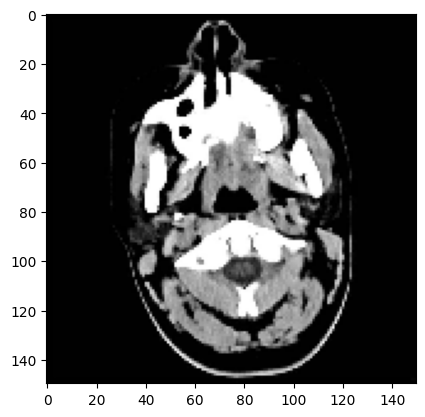

In [9]:
path = '/content/brain-stroke/Brain_Stroke_CT-SCAN_image/Train/Normal/100 (1).jpg'
ct_image = Image.load_img(path, target_size=(150,150))

plt.imshow(ct_image)

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
      print("\Accuracy telah mencapai >92%!")
      self.model.stop_training = True
callbacks = myCallback()

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    horizontal_flip=True,
    zoom_range=0.5,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [28]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=30,
    shuffle=True,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=30,
    shuffle=True,
    class_mode='binary'
)

Found 1843 images belonging to 2 classes.
Found 235 images belonging to 2 classes.


In [32]:
model = tf.keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(.2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(.3),
    keras.layers.Conv2D(256, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
  ])


In [33]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [25]:
val_generator

In [34]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 20,
    batch_size = 120,
    callbacks=[callbacks]
)

Epoch 1/20
62/62 [==============================] - 30s 258ms/step - loss: 0.7430 - accuracy: 0.5681 - val_loss: 0.6416 - val_accuracy: 0.6681
Epoch 2/20
62/62 [==============================] - 14s 229ms/step - loss: 0.6818 - accuracy: 0.5898 - val_loss: 0.6391 - val_accuracy: 0.6681
Epoch 3/20
62/62 [==============================] - 14s 229ms/step - loss: 0.6788 - accuracy: 0.5898 - val_loss: 0.6548 - val_accuracy: 0.6681
Epoch 4/20
62/62 [==============================] - 14s 229ms/step - loss: 0.6744 - accuracy: 0.5898 - val_loss: 0.6577 - val_accuracy: 0.6681
Epoch 5/20
62/62 [==============================] - 14s 233ms/step - loss: 0.6748 - accuracy: 0.5898 - val_loss: 0.6615 - val_accuracy: 0.6681
Epoch 6/20
62/62 [==============================] - 14s 229ms/step - loss: 0.6781 - accuracy: 0.5865 - val_loss: 0.6529 - val_accuracy: 0.6681
Epoch 7/20
62/62 [==============================] - 15s 244ms/step - loss: 0.6747 - accuracy: 0.5898 - val_loss: 0.6388 - val_accuracy: 0.6723

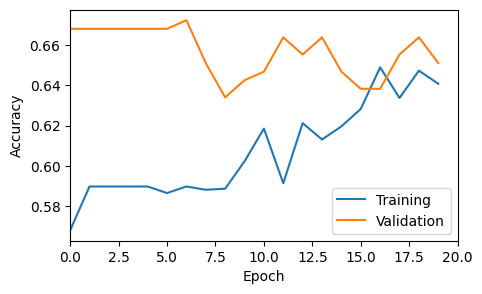

In [35]:
# plt.title('Akurasi Data Training & Validation')
plt.figure(figsize=(5, 3))
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xlim(0,20)
plt.legend()
plt.show()

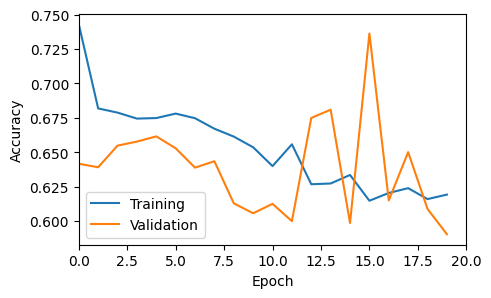

In [36]:
# plt.title('Loss Data Training & Validation')
plt.figure(figsize=(5, 3))
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xlim(0,20)
plt.legend()
plt.show()

In [37]:
json_model = model.to_json()


#save the model to json
with open("ct_brain_stroke_model.json", "w") as json_file:
  json_file.write(json_model)